# Simple Sentiment Analysis 
## Approach : Using Recurrent Neural Network, specifically Long Short Term Memory (LSTM)
<br>
The reasoning behind this approach would be RNN allow the modelling process to take account of the context behind each tweet/text. Other classification algorithm would definitely be able to classify positive and negative as a binary classfication problem but it would not take account that each word before and after one another hold a certain weights/context which can determine a tweet/text sentiments.
<br>
LSTM is an extension of RNN where it can store information longer than RNN. On top of that, LSTM introduced a bidirectional cell state where the words before and after are used as information. This shows that RNN(LSTM) is ideal when it comes to handling textual or better yet, NLP problems<br>

However, despite having all of this pros, LSTM are not an end all be all. It is prone to overfitting and it is evident in this notebook thus needing extensive research to include regularization like dropouts and etc. On top of that, it takes quite a resourse in terms of hardware to train an LSTM model. As an example, a simple LSTM model in this notebook trained for around 20 minutes each epoch and I managed to just run it with 10 epochs albeit that my hardware is not near the min requirement for mordern machine learning training. Therefore it is not very efficient. <br>

Despite all of that, let us look at how I use LSTM to tacle this task. 



## Loading the essential libraries

In [1]:
#Essentials
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

#NLTK Corpus
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

#Train and test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Pretty Visuals
import seaborn as sns

#Wordcloud
from wordcloud import WordCloud

#To replace words
import re

#For Readability
pd.set_option('display.max_colwidth', -1)

print("Tensorflow Version:", tf.__version__)
print("All library loaded")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dania\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dania\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dania\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Tensorflow Version: 2.6.0
All library loaded


## Exploring the dataset, EDA

In [3]:
#Loading the dataset
cols = ['sentiment','id','date','query_string','user','text']
df = pd.read_csv('training.1600000.processed.noemoticon.csv',
                 encoding = 'latin-1',header=None, names=cols)
df.head()

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


In [4]:
#We will only keep the sentiment and text columns for this task
df = df.drop(['id', 'date', 'query_string', 'user'], axis=1)
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


In [5]:
#Now to look at the unique values of the sentiment
print("Number of unique values for sentiment: ", df.sentiment.nunique())
print("The unique values for sentiment: ", df.sentiment.unique())


Number of unique values for sentiment:  2
The unique values for sentiment:  [0 4]


In [6]:
#We will look at the top 5 for each sentiment values 
print('Sentiment value of 0')
df[df['sentiment']==0].head()

Sentiment value of 0


,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


In [7]:
print('Sentiment value of 4')
df[df['sentiment']==4].head()

Sentiment value of 4


,sentiment,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart."
800003,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup"
800004,4,@LovesBrooklyn2 he has that effect on everyone


##### By reading the documentation provided on the web and also by looking at the data, we can confirm that 0:negative and 4:positive
##### Let us change the value into negative and positive to view the data at hand before splitting it and preprocessing it.

In [9]:
val_to_sentiment = {0:"Negative", 4:"Positive"}
df.sentiment = df.sentiment.apply(lambda x: val_to_sentiment[x])
df.head()

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,Negative,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,Negative,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


<AxesSubplot:xlabel='sentiment'>

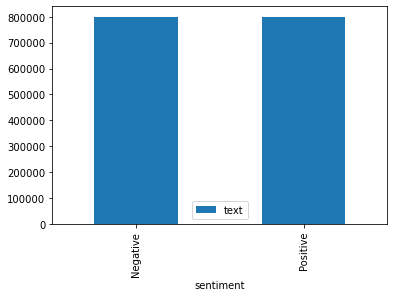

In [10]:
#Looking at the distribution of the sentiments
df.groupby('sentiment').count().plot(kind='bar')

##### It is good to see that there is a balance in terms of the number of data for both positive and negative 

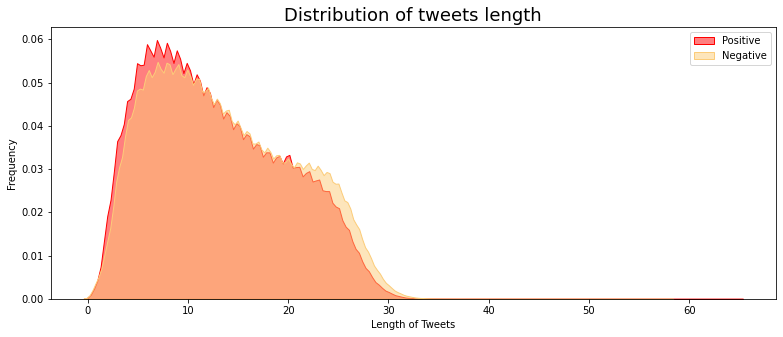

In [11]:
#Now let us look if there is a difference in the length of tweets when it comes to positive and negative sentiments
df['length'] = df.text.str.split().apply(len)
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["sentiment"]=='Positive']["length"], alpha=0.5,shade = True, color="red", label="Positive", ax = ax)
sns.kdeplot(df[df["sentiment"]=='Negative']["length"], alpha=0.5,shade = True, color="#fccc79", label="Negative", ax = ax)
plt.title('Distribution of tweets length', fontsize = 18)
ax.set_xlabel("Length of Tweets")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

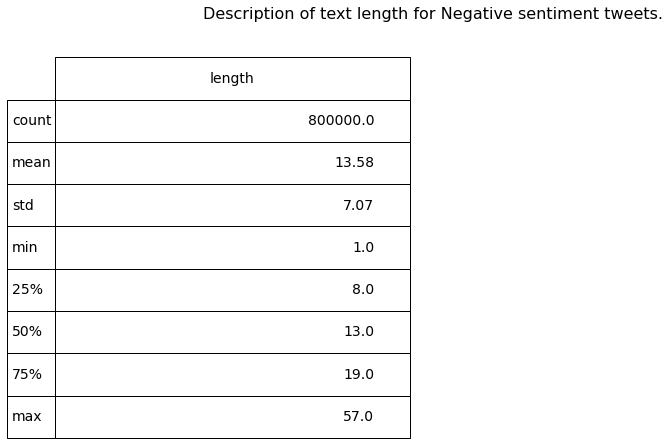

In [12]:
fig = plt.figure(figsize=(14,7))
ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
describe = df.length[df.sentiment=='Negative'].describe().to_frame().round(2)
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Description of text length for Negative sentiment tweets.', fontsize=16)
plt.show()

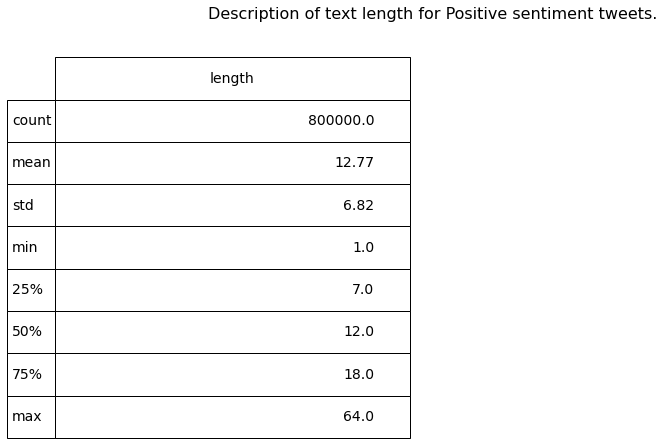

In [13]:
fig = plt.figure(figsize=(14,7))
ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
describe = df.length[df.sentiment=='Positive'].describe().to_frame().round(2)
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Description of text length for Positive sentiment tweets.', fontsize=16)
plt.show()

##### We can briefly conclude that there is not enough difference to use length as a feature to differentiate sentiments.
##### However, it is still good to explore the data beforehand. We will however drop the length column. 

In [14]:
df.drop(['length'], axis=1, inplace=True)
df.head()

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,Negative,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,Negative,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


## Text Preprocessing

The preprocessing steps are like below:
<li>replacing all non-english characters</li>
<li>Removing Stopwords</li>
<li>Lemmatization</li>
<br> The reason for lemmatization over stemming is due to stemming can get rid off the meaning of the word 

In [16]:
stop_words = stopwords.words('english')
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [18]:
def process_tweets(tweet):
    
    tweet = re.sub(text_cleaning_re, ' ', str(tweet).lower()).strip()
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stop_words]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [19]:
df['processed_tweets'] = df['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [20]:
df.head(8)

,sentiment,text,processed_tweets
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",awww bummer shoulda got david carr third day
1,Negative,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,upset update facebook texting might cry result school today also blah
2,Negative,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,dived many time ball managed save 50 rest go bound
3,Negative,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,Negative,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",behaving mad see
5,Negative,@Kwesidei not the whole crew,whole crew
6,Negative,Need a hug,need hug
7,Negative,"@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?",hey long time see yes rain bit bit lol fine thanks


## Wordcloud

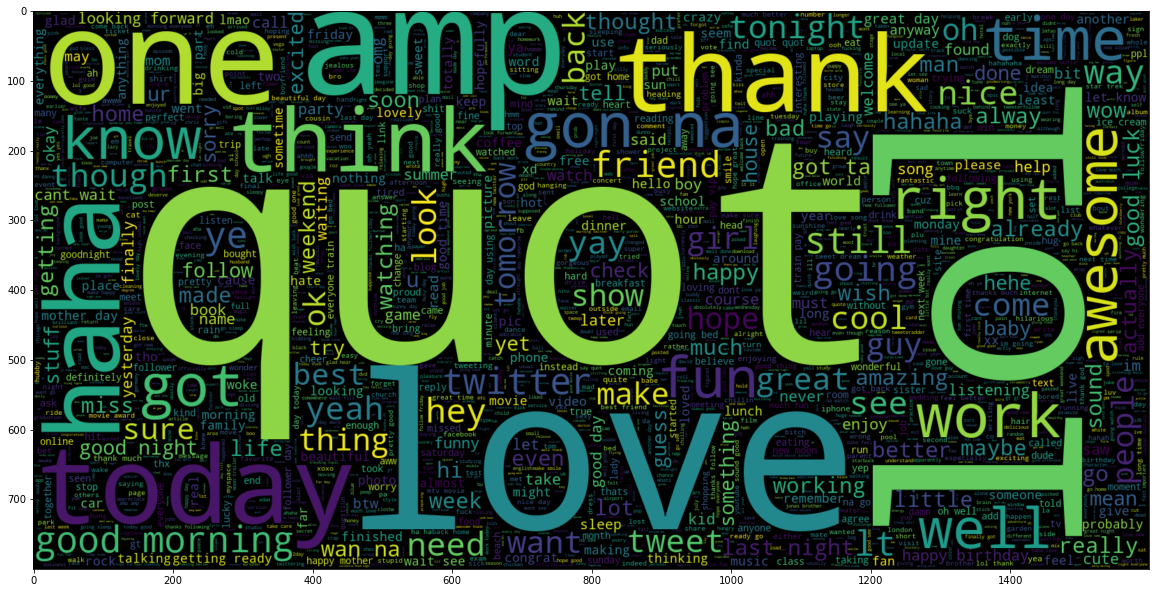

In [21]:
#No we will use wordcloud to look at the words
#Positive tweets

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

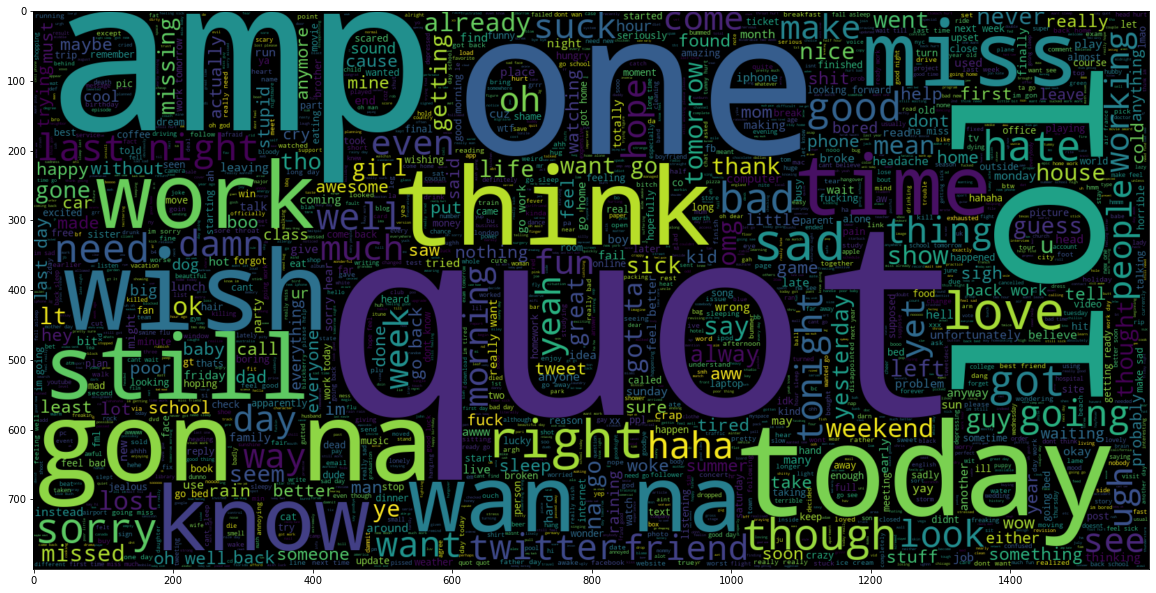

In [22]:
#Negative tweets
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

##### From the wordcloud, we can look at some of the negative connotation like sorry, suck, sick. we can also look at some of the positive ones like love, lol, good and thank. 

## Train and Test Split

In [23]:
#Train and test split
df_train, df_test = train_test_split(df, test_size=0.33, random_state=42)

print("Train Data size:", len(df_train))
print("Test Data size", len(df_test))

Train Data size: 1072000
Test Data size 528000


In [24]:
df_train.head(5)

,sentiment,text,processed_tweets
762637,Negative,Probelm with nap: i'm not good at waking up. I JUST got up,probelm nap good waking got
1177984,Positive,btw I made muffins today,btw made muffin today
1560678,Positive,rain comes again,rain come
797330,Negative,@bsemaj calll meeeeee,calll meeeeee
1421115,Positive,with dafiii the best girl everr! MILEY COME TO ARGENTINAAA PLEASE!,dafiii best girl everr miley come argentinaaa please


In [26]:
#Tokenization
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.processed_tweets)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1 # need to plus 1 as it starts from 0
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 248715


In [27]:
MAX_SEQ_LEN = 35
#Padding the sequences with zeros 
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.processed_tweets),
                       maxlen = MAX_SEQ_LEN)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.processed_tweets),
                      maxlen = MAX_SEQ_LEN)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (1072000, 35)
Testing X Shape: (528000, 35)


In [28]:
#Label encoding 
encoder = LabelEncoder()
encoder.fit(df_train.sentiment.to_list())

y_train = encoder.transform(df_train.sentiment.to_list())
y_test = encoder.transform(df_test.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1072000, 1)
y_test shape: (528000, 1)


## Model Building 
<br> The model is build by just using a simple embedding to vectorize the token/words, will then proceed with a layer of bidirectional LSTM which allows both precedding and procedding words to be taken into context and finished with a layer of relu and Sigmoid to produce an output of scores ranging from 0 to 1

In [29]:
#Model building lib
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from keras.metrics import Precision, Recall
from keras import losses

In [30]:
#Building a simple LSTM model with a layer of Rectified Linear Unit and an output layer using Sigmoid
model = Sequential(
[
    Embedding(vocab_size,64),
    Bidirectional(LSTM(32)),
    Dense(64, activation='relu'),
    Dense(1,activation='sigmoid')
]
)

In [31]:
print(model.summary())

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit(x_train, y_train,
                      batch_size=batch_size, epochs=10, verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          15917760  
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 15,946,817
Trainable params: 15,946,817
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
16750/16750 [==============================] - 1677s 100ms/step - loss: 0.4650 - accuracy: 0.7769 - precision: 0.7732 - recall: 0.7828
Epoch 2/10
16750/16750 [==============================] - 1683s 100ms/step - loss: 0.4083 -

##### The high accuracy is raising quite the red flag as it could mean that the model is overfitting with it the training data. Let us evaluate the model with the test datasets

In [33]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(x_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))


Accuracy  : 0.7474
Precision : 0.7525
Recall    : 0.7394


##### The test datasets shows that the high accuracy was indeed an overfitting and this could be combatted by using cross-validation, adding Dropouts, proper regularization and also looking at a more complex algorithms 

### Establish Treshold for model predict score
We would then need to clarify what value could be consider as positive and what value would be consider as negative and for this case, we would just label the sentiment into >0,5 is positive sentiment and else would be negative

In [53]:
def define_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1)
y_pred = [define_sentiment(score) for score in scores]

16500/16500 [==============================] - 79s 5ms/step


In [55]:
#Let us look at the classification report 
from sklearn.metrics import classification_report
print(classification_report(list(df_test.sentiment), y_pred))

              precision    recall  f1-score   support

    Negative       0.74      0.76      0.75    263321
    Positive       0.75      0.74      0.75    264679

    accuracy                           0.75    528000
   macro avg       0.75      0.75      0.75    528000
weighted avg       0.75      0.75      0.75    528000



## Verdict
It is safe to say that even with a simple LSTM method, the model managed to achive a reasonable accuracy. However, further improvement can and should be made to note this as a viable product. 
<br>

Pre-processing improvement:
<li>Get rid of the same words that is in positive and negative tweets</li>
<li>Handle non-english characters/words even better</li>
<li>Proper Word Embedding, ie pre-trained embedding</li>
<br>
Model Improvement:
<li>Feature extraction</li>
<li>Hyperparameter tuning</li>
<li>Cross-Validation</li>
<li>Better opitimizer</li>
<li>Better regularization</li>

## Saving The Model

In [66]:
model.save('Sentiment_Analysis.h5')
print('The Sentiment Model saved')

The Sentiment Model saved


## Let us test the model and have some fun :)

In [67]:
from keras.models import load_model
play_model = load_model('Sentiment_Analysis.h5')

In [68]:
#Create a function to predict sentiment
def pred_class(text):
    '''Function to predict sentiment class of the passed text'''   
    sequence = tokenizer.texts_to_sequences(text)
    test = pad_sequences(sequence, maxlen=50)
    pred = play_model.predict(test)
    pred_res = define_sentiment(pred)
    
    print('The sentiment is: ', pred_res)       

In [69]:
pred_class(["I think the world is bad"])

The sentiment is:  Negative


In [70]:
pred_class(["I love my mom"])

The sentiment is:  Positive


In [71]:
pred_class(["chocolate is bad"])

The sentiment is:  Negative


In [72]:
pred_class(["When you have a dream, you’ve got to grab it and never let go"])

The sentiment is:  Negative


##### I think that should be a positive quotes? 

In [73]:
pred_class(["Spread love everywhere you go"])

The sentiment is:  Positive


In [74]:
pred_class(["I am not flying to England"])


The sentiment is:  Positive


##### That should be negative?